In [1]:
%run ../scripts/bls_wikidata_matchup.py

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


import numpy as np

In [4]:
np.corrcoef(bls_wd.bls_total, bls_wd.wd_total)

array([[ 1.        , -0.18481444],
       [-0.18481444,  1.        ]])

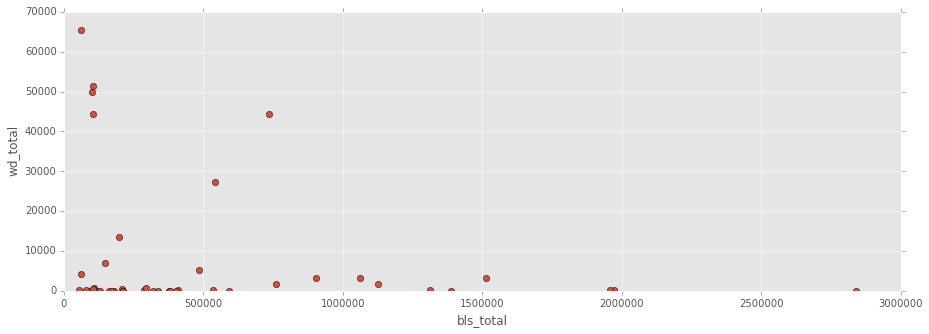

In [12]:
plt.plot(bls_wd.bls_total, bls_wd.wd_total,  'o')
plt.xlabel('bls_total')
plt.ylabel('wd_total')
#plt.show()

In [6]:
np.corrcoef(bls_wd.bls_p_women, bls_wd.wd_p_women)

array([[ 1.       , -0.2192591],
       [-0.2192591,  1.       ]])

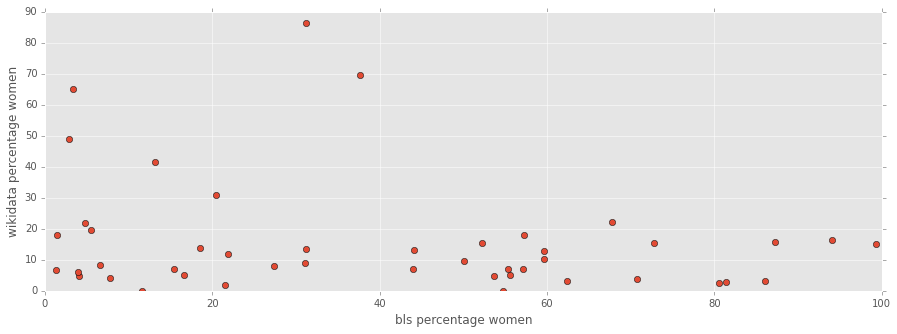

In [13]:
plt.plot(bls_wd.bls_p_women, bls_wd.wd_p_women,  'o')
plt.xlabel('bls percentage women')
plt.ylabel('wikidata percentage women')

In [8]:
bls_wd


,bls_occupation,wd_occupation,bls_total,bls_p_women,wd_total,wd_women,wd_p_women
0,Aircraft pilots and flight engineers,"[astronaut, aviator, navigator]",1513000,27.4,3239,260,8.027169
5,Bartenders,"[bartender, sommelier, oenologist]",378000,31.2,59,8,13.559322
6,Bill and account collectors,[treasurer],82000,62.4,33,1,3.030303
7,Biological scientists,"[agronomist, horticulturist, forester, ecologist]",107000,59.6,691,70,10.130246
13,Chemists and materials scientists,"[chemist, metallurgist]",149000,16.6,6973,350,5.019360
14,Chief executives,"[president and chief executive officer, hotel ...",101000,50.1,49818,4748,9.530692
18,Clergy,"[Rosh yeshiva, religious servant, saint, clerg...",734000,80.6,44425,1125,2.532358
19,Clinical laboratory technologists and technicians,"[nutritionist, food chemist]",408000,20.5,187,58,31.016043
20,Computer programmers,"[hacker, computer scientist]",1061000,31.1,3127,284,9.082187
22,Construction laborers,[construction worker],2838000,81.4,36,1,2.777778


In [9]:
bls_wd.sort('wd_p_women')

/home/hargup/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bls_occupation,wd_occupation,bls_total,bls_p_women,wd_total,wd_women,wd_p_women
93,"Welding, soldering, and brazing workers","[miller, gunsmith, miner, shipbuilder]",81000,11.6,146,0,0.000000
38,Elementary and middle school teachers,[schoolmaster],85000,54.7,41,0,0.000000
52,Machinists,"[locksmith, Tool and die maker, machinist]",403000,21.5,55,1,1.818182
18,Clergy,"[Rosh yeshiva, religious servant, saint, clerg...",734000,80.6,44425,1125,2.532358
22,Construction laborers,[construction worker],2838000,81.4,36,1,2.777778
6,Bill and account collectors,[treasurer],82000,62.4,33,1,3.030303
40,"Engineers, all other","[business engineering, engineer]",103000,86.1,44260,1462,3.303208
37,Electricians,"[technics, electrician]",211000,70.7,53,2,3.773585
83,"Tax examiners and collectors, and revenue agents",[statutory auditor],118000,7.8,24,1,4.166667
88,Tellers,[bank teller],129000,4.1,42,2,4.761905
